# Bike Thefts in Seattle are most common in the North Preinct during 3pm - 1am 



In this small investigation of the Seattle crime Data I will focus on bike thefts. For the investigation I am using Python3 and the pandas package. For visualizations I am using seaborn and matplotlib. 

I will show that most bike thefts are reported in the North Police Preinct during 3pm - 1 am 


In [185]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set(style="darkgrid")
%matplotlib inline

## Preparing the data

### First Step:

First I am loading the data using pandas read_csv() function. After that I convert dates into datetime variables and extract information abour the weekday, date, and hour into new columns

In [186]:
df_seattle = pd.read_csv('seattle_incidents_summer_2014.csv')

df_seattle['Occurred Date Range End'] = pd.to_datetime(df_seattle['Occurred Date Range End'])
df_seattle['Occurred Date or Date Range Start'] = pd.to_datetime(df_seattle['Occurred Date or Date Range Start'])
df_seattle['Date Reported'] = pd.to_datetime(df_seattle['Date Reported'])
df_seattle['Weekday'] = df_seattle['Occurred Date or Date Range Start'].dt.weekday
df_seattle['Date'] = df_seattle['Occurred Date or Date Range Start'].dt.date
df_seattle['Hour'] = df_seattle['Occurred Date or Date Range Start'].dt.hour

bike_theft_seattle = df_seattle[df_seattle['Summarized Offense Description'] == 'BIKE THEFT']

### Second Step: 

According to the Seattle website (https://www.seattle.gov/police/information-and-data/tweets-by-beat) the Police Districts given in the Dataset (row 'District/Sector') are assigned to 5 different Preincts. The Preincts are geographic areas in Seattle. 

Therefore I will assign each Bike Theft to a Preinct according to the District the crime was reported in. 

In [164]:
def get_preinct(row):
    if row['District/Sector'] in ['C', 'E', 'G']:
        return 'East'
    if row['District/Sector'] in ['W', 'F']:
        return 'Southwest'
    if row['District/Sector'] in ['N', 'L', 'J', 'B', 'U']:
        return 'North'
    if row['District/Sector'] in ['Q', 'D', 'M', 'K']:
        return 'West'
    if row['District/Sector'] in ['O', 'R', 'S']:
        return 'South'
    else:
        return 'None'

## First Visualization

Next I will plot the amount of reported bike thefts in a bar graph by District. The bar will be colored accoridng to their police preinct.  

/Users/kilian_stu/anaconda2/envs/jupyter-data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



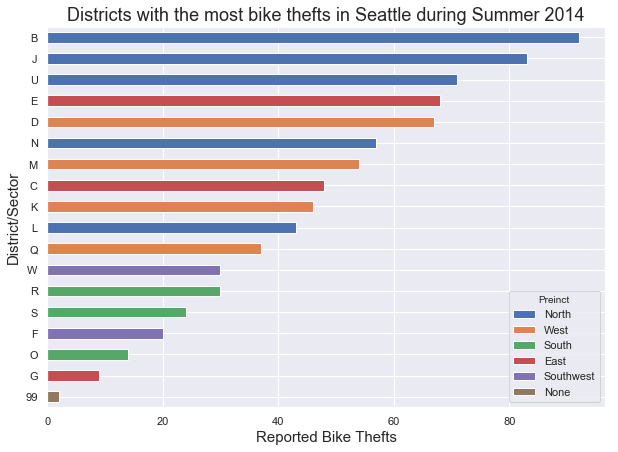

In [189]:

bike_theft_seattle['Preinct'] = bike_theft_seattle.apply(lambda x: get_preinct(x), axis=1)


df_plot = (bike_theft_seattle.groupby(['Preinct', 'District/Sector'])
                               .size()
                               .reset_index()
                               .pivot(columns='Preinct', index='District/Sector', values=0)
                               .fillna(0))

df_plot['Total'] = df_plot.apply(sum, axis=1)
df_plot.sort_values('Total', ascending=True, inplace=True)
df_plot = df_plot[['North', 'West', 'South', 'East', 'Southwest', 'None']]

df_plot.plot(kind='barh', stacked=True, sort_columns=True, figsize=(10,7) )

plt.title('Districts with the most bike thefts in Seattle during Summer 2014', size=18)
plt.xlabel('Reported Bike Thefts', size=15)
plt.ylabel('District/Sector', size=15);

In the above visualization you can see that the top 3 Districts with the most reported bike thefts are all in the North Preinct. In contrast the South and the Southwest district represent the districts with the lowest reported bike thefts.

## Second Visualization
In the second visualization I will plot the data for the North Preinct. I will plot a bar graph representing the amount bike thefts reported during each hour of the day 

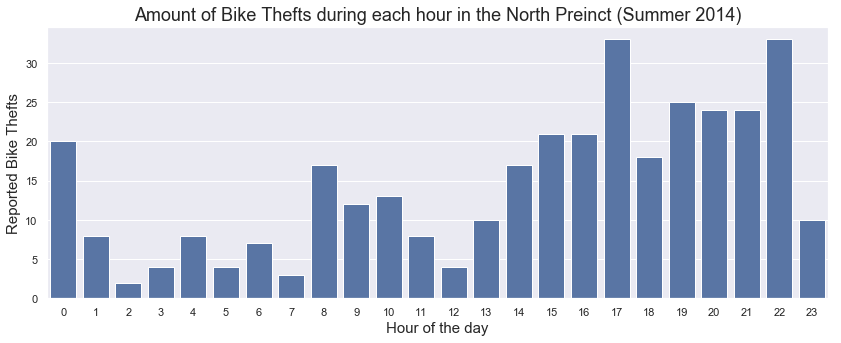

In [196]:
plt.figure(figsize=(14,5))

sns.countplot(bike_theft_seattle.loc[bike_theft_seattle['Preinct'] == 'North', 'Hour'],
              color=sns.color_palette()[0])

plt.title('Amount of Bike Thefts during each hour in the North Preinct (Summer 2014)', size=18)
plt.xlabel('Hour of the day', size=15)
plt.ylabel('Reported Bike Thefts', size=15);

The above visualization shows the amount of bike thefts reported for every hour of the day during Summer 2014. It can be seen that most bike thefts occur during 3pm - 1am. A second peak can be seen during 8am-11am. This might be when people go to work by bike. 